<a href="https://colab.research.google.com/github/DonnaVakalis/Livability/blob/master/canadian_cities_research_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>Where to Live in Canada? A personalizeable 'livability' assessment dashboard</center></h1>

The portion of employees able to work remotely is increasing, resulting in decoupling a company’s geographic location from worker’s choice of where to live. This opens up the possibility to choose where to live based on other metrics, such as local air quality, affordability, proximity to family, ‘good’ weather.

Existing livability indices (e.g., https://en.wikipedia.org/wiki/Global_Liveability_Ranking) are useful, yet they are not customizable. This project will aggregate conventional livability metrics with personal preference inputs, such as weather preference and proximity to other cities (e.g., friends and family) into an online dashboard for anyone to search for their best place to live.



in case it's useful: reference 'how to launch a dash app' in colab: https://stackoverflow.com/questions/53622518/launch-a-dash-app-in-a-google-colab-notebook

as well as here https://community.plotly.com/t/colab-and-easy-dash-sample/26799

and then quick example with iris dataset: https://plotly.com/python/line-and-scatter/

some inspiration:

https://groundrush.pythonanywhere.com/


## 0. Preamble (installs)

In [ ]:
%%time 
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install widgets for interactive notebook functionality
!apt install ipywidgets 
# Install plotlyExpress
!pip install plotly_express
# Install contextily for adding basemaps to geo
!pip install contextily


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 0s (17.4 MB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1

## 1. Import libraries and data sets



### 1.1 Import libraries

In [ ]:
import pandas as pd
import numpy as np

import os
from google.colab import drive

import geopandas as gpd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import cufflinks as cf

from IPython.display import HTML #(then use HTML(fig.to_html()))
import contextily as ctx

import plotly_express as px


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px


### 1.2 Mount google drive

In [ ]:
# mount google drive
drive.mount('/content/gdrive/')

root_dir = "/content/gdrive/My Drive/Colab Notebooks/"
base_dir = root_dir + 'data_viz_club/'


Mounted at /content/gdrive/


### 1.3 Go get the data sets!

#### Data Provenance
Public Datasets Used:

Statistics Canada 2016 Census Data portal

Historical Climatology v4 data
[World Health Organization] (https://apps.who.int/gho/data/node.home) 

Datasets for ambient air pollution, road safety and health coverage
from IMF Global Housing Data

Expanded Project Datasets (for inclusion later on):
 

In [ ]:
# Read in data

# Read Geography (Census Metro Areas + Census "Agglomerations"--> Geopandas
# from https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm
file = base_dir + 'raw_data_files/lcma000b16a_e.shp'
dat_cities = gpd.read_file(file)
dat_cities_geo = gpd.GeoDataFrame.from_file(file)

# Read land area 
# https://en.wikipedia.org/wiki/List_of_Canadian_census_agglomerations_by_province_or_territory#cite_note-7
file = base_dir + 'raw_data_files/cma_land_pop2016 - Sheet1.csv'
dat_dens = pd.read_csv(file)

# Read census profiles
# https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/download-telecharger/comp/page_dl-tc.cfm?Lang=E
file = base_dir + 'raw_data_files/98-401-X2016041_English_CSV_data.csv'
dat_census = pd.read_csv(file)

# Read census dwelling types AND total population 
# from https://www12.statcan.gc.ca/datasets/Index-eng.cfm?Temporal=2016&Theme=-1&VNAMEE=&GA=3&S=0
file = base_dir + 'raw_data_files/census_dwellings_98-400-X2016014_English_CSV_data.csv'
dat_dwells = pd.read_csv(file, encoding="ISO-8859-1") # nrows=5162?

# Read census commuting and occupation 
# from https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/Lp-eng.cfm?LANG=E&APATH=7&DETAIL=0&DIM=0&FL=C&FREE=0&GC=0&GID=0&GK=0&GRP=1&PID=0&PRID=10&PTYPE=109445&S=0&SHOWALL=0&SUB=0&Temporal=2016,2017&THEME=0&VID=0&VNAMEE=Commuting%20duration%20%286%29&VNAMEF=Dur%C3%A9e%20du%20trajet%20domicile%2Dlieu%20de%20travail%20%286%29
file = base_dir + 'raw_data_files/census_dwellings_98-400-X2016014_English_CSV_data.csv'
dat_mode = pd.read_csv(file, encoding="ISO-8859-1") # nrows=5162?

# Read businesses by NAICS shares


# Read Air Quality averages

# Cost of living

# Weather 

# Distances between places

# Comparison international cities



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.



## Clean and tidy

#### clean up geo data


In [ ]:
# get geo dat, change esrg and geo_code to int

df_geo = dat_cities_geo[['CMAPUID',
                         'CMANAME',
                         'PRNAME',
                         'geometry']].rename(columns={'CMAPUID':'geo_code',
                         'CMANAME':'geo_name',
                         'PRNAME':'province'}).to_crs(epsg=3857)
df_geo['geo_code'] = df_geo['geo_code'].astype(int)

#### clean up census data


In [ ]:
df_census_0 = dat_census[['GEO_NAME',
                          'ALT_GEO_CODE',
                          'DIM: Profile of Census Metropolitan Areas/Census Agglomerations (2247)',
                          'Dim: Sex (3): Member ID: [1]: Total - Sex',
                          'Dim: Sex (3): Member ID: [2]: Male',
                          'Dim: Sex (3): Member ID: [3]: Female']].rename(columns={
                              'GEO_NAME' : 'geo_name',
                              'ALT_GEO_CODE' : 'geo_code',
                              'DIM: Profile of Census Metropolitan Areas/Census Agglomerations (2247)':'feature',
                              'Dim: Sex (3): Member ID: [1]: Total - Sex':'count_all',
                              'Dim: Sex (3): Member ID: [2]: Male' : 'count_male',
                              'Dim: Sex (3): Member ID: [3]: Female' : 'count_female'})  

features_of_interest = ['Population, 2016',
                   'Land area in square kilometres',
                   'Median age of the population',
                   'Total - Occupied private dwellings by structural type of dwelling - 100% data',
                   'Single-detached house',
                   'Apartment in a building that has five or more storeys',
                   'Average household size',
                   'Total - Knowledge of official languages for the total population excluding institutional residents - 100% data',
                   'Neither English nor French',
                   'Official language minority (percentage)',
                   'Total - Language spoken most often at home for the total population excluding institutional residents - 100% data',
                   'Non-official languages',
                   'Number of total income recipients aged 15 years and over in private households - 100% data',
                   'Median total income in 2015 among recipients ($)',
                   'Number of government transfers recipients aged 15 years and over in private households - 100% data',
                   'Composition of total income in 2015 of the population aged 15 years and over in private households (%) - 100% data',
                   'Market income (%)',
                   'Employment income (%)',
                   'Government transfers (%)',
                   'Total - Generation status for the population in private households - 25% sample data',
                   'First generation',
                   'Second generation',
                   'Total - Aboriginal identity for the population in private households - 25% sample data',
                   'Aboriginal identity',
                   'Total - Private households by tenure - 25% sample data',
                   'Owner',
                   'Renter',
                   'Band housing',
                   'Total - Occupied private dwellings by period of construction - 25% sample data',
                   '1960 or before',
                   '2011 to 2016',
                   'Total - Highest certificate, diploma or degree for the population aged 15 years and over in private households - 25% sample data',
                   'No certificate, diploma or degree',
                   'Secondary (high) school diploma or equivalency certificate',
                   'University certificate, diploma or degree at bachelor level or above',
                   'Degree in medicine, dentistry, veterinary medicine or optometry',
                   'Earned doctorate',
                   'Postsecondary certificate, diploma or degree',
                   'Same as province or territory of residence', #location of study
                   'Location of study outside Canada',
                   'Total - Population aged 15 years and over by Labour force status - 25% sample data',
                   'Participation rate',
                   'Unemployment rate',
                   'All occupations',
                   '0 Management occupations',
                   '1 Business, finance and administration occupations',
                   '2 Natural and applied sciences and related occupations',
                   '3 Health occupations',
                   '4 Occupations in education, law and social, community and government services',
                   '5 Occupations in art, culture, recreation and sport',
                   '6 Sales and service occupations',
                   '7 Trades, transport and equipment operators and related occupations',
                   '8 Natural resources, agriculture and related production occupations',
                   '9 Occupations in manufacturing and utilities',
                   'Total - Place of work status for the employed labour force aged 15 years and over in private households - 25% sample data',
                   'Worked at home',
                   'Worked outside Canada',
                   'No fixed workplace address',
                   'Worked at usual place',
                   'Total - Main mode of commuting for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data',
                   'Car, truck, van - as a driver',
                   'Car, truck, van - as a passenger',
                   'Public transit',
                   'Walked',
                   'Bicycle',
                   'Other method',
                   'Total - Commuting duration for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data',
                   'Less than 15 minutes',
                   '60 minutes and over']

df_census_1 = df_census_0[df_census_0['feature'].isin(features_of_interest)]

In [ ]:
# need to convert feature and count columns to numeric types
cols = ['count_all', 'count_male','count_female']
df_census_1[cols] = df_census_1[cols].apply(pd.to_numeric, errors='coerce')
df_census_2 = df_census_1.pivot_table(index=['geo_name','geo_code'], columns='feature', values='count_all')
df_census_2.columns


Index(['0 Management occupations',
       '1 Business, finance and administration occupations', '1960 or before',
       '2 Natural and applied sciences and related occupations',
       '2011 to 2016', '3 Health occupations',
       '4 Occupations in education, law and social, community and government services',
       '5 Occupations in art, culture, recreation and sport',
       '6 Sales and service occupations', '60 minutes and over',
       '7 Trades, transport and equipment operators and related occupations',
       '8 Natural resources, agriculture and related production occupations',
       '9 Occupations in manufacturing and utilities', 'Aboriginal identity',
       'All occupations',
       'Apartment in a building that has five or more storeys',
       'Average household size', 'Band housing', 'Bicycle',
       'Car, truck, van - as a driver', 'Car, truck, van - as a passenger',
       'Composition of total income in 2015 of the population aged 15 years and over in private hou

In [ ]:
# check for scatter plot suitability

# Pick columns of interest and create additional features of interest...
df_census_2

,feature,0 Management occupations,"1 Business, finance and administration occupations",1960 or before,2 Natural and applied sciences and related occupations,2011 to 2016,3 Health occupations,"4 Occupations in education, law and social, community and government services","5 Occupations in art, culture, recreation and sport",6 Sales and service occupations,60 minutes and over,"7 Trades, transport and equipment operators and related occupations","8 Natural resources, agriculture and related production occupations",9 Occupations in manufacturing and utilities,Aboriginal identity,All occupations,Apartment in a building that has five or more storeys,Average household size,Band housing,Bicycle,"Car, truck, van - as a driver","Car, truck, van - as a passenger",Composition of total income in 2015 of the population aged 15 years and over in private households (%) - 100% data,"Degree in medicine, dentistry, veterinary medicine or optometry",Earned doctorate,Employment income (%),First generation,Government transfers (%),Land area in square kilometres,Less than 15 minutes,Location of study outside Canada,Market income (%),Median age of the population,Median total income in 2015 among recipients ($),Neither English nor French,"No certificate, diploma or degree",No fixed workplace address,Non-official languages,Number of government transfers recipients aged 15 years and over in private households - 100% data,Number of total income recipients aged 15 years and over in private households - 100% data,Official language minority (percentage),Other method,Owner,Participation rate,"Population, 2016","Postsecondary certificate, diploma or degree",Public transit,Renter,Same as province or territory of residence,Second generation,Secondary (high) school diploma or equivalency certificate,Single-detached house,Total - Aboriginal identity for the population in private households - 25% sample data,Total - Commuting duration for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data,Total - Generation status for the population in private households - 25% sample data,"Total - Highest certificate, diploma or degree for the population aged 15 years and over in private households - 25% sample data",Total - Knowledge of official languages for the total population excluding institutional residents - 100% data,Total - Language spoken most often at home for the total population excluding institutional residents - 100% data,Total - Main mode of commuting for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data,Total - Occupied private dwellings by period of construction - 25% sample data,Total - Occupied private dwellings by structural type of dwelling - 100% data,Total - Place of work status for the employed labour force aged 15 years and over in private households - 25% sample data,Total - Population aged 15 years and over by Labour force status - 25% sample data,Total - Private households by tenure - 25% sample data,Unemployment rate,"University certificate, diploma or degree at bachelor level or above",Walked,Worked at home,Worked at usual place,Worked outside Canada
geo_name,geo_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abbotsford - Mission,59932,9475.0,12455.0,4285.0,3460.0,4522.5,5835.0,9410.0,1970.0,20385.0,9410.0,19300.0,4875.0,5250.0,9755.0,92415.0,1065.0,2.8,10.0,455.0,68580.0,6255.0,100.0,702.5,425.0,73.1,47140.0,13.6,607.13,26545.0,10577.5,86.4,39.4,30370.0,8387.5,22095.0,15995.0,36103.75,98355.0,137185.0,0.9,1065.0,44825.0,65.6,180518.0,56571.25,1990.0,17800.0,38740.0,45375.0,39512.5,28405.0,176330.0,80900.0,176330.0,143095.0,177465.0,177465.0,80905.0,62630.0,62630.0,87815.0,143095.0,62630.0,6.5,19627.5,2560.0,6555.0,64910.0,360.0
Alma,24410,1165.0,2035.0,3730.0,790.0,465.0,1275.0,1900.0,230.0,3835.0,490.0,2855.0,290.0,935.0,1230.0,15310

### create list of city names

In [ ]:
lst_cities = list(dat_cities.CMANAME) # 156 CMAs
lst_cities2 = list(dat_dens.GEO_NAME) # 120 all those for which I have population and land area

### clean up dwellings data


In [ ]:
# clean up and organize dwellings data: 

df_dwel_0 = dat_dwells[(dat_dwells.GEO_LEVEL==2) | (dat_dwells.GEO_LEVEL==3)][['ALT_GEO_CODE',
                                                                                'GEO_NAME',
                                                                                'DIM: Structural type of dwelling (10)',
                                                                                'Dim: Age (20): Member ID: [1]: Total - Age'
                                                                                ]].rename(columns={'ALT_GEO_CODE':'geo_code',
                                                                                                 'GEO_NAME':'geo_name',
                                                                                                 'DIM: Structural type of dwelling (10)':'dwell_type',
                                                                                                 'Dim: Age (20): Member ID: [1]: Total - Age':'dwell_count'})
# drop rows not in cities list 
df_dwel_1 = df_dwel_0[df_dwel_0['geo_name'].isin(lst_cities2)]
df_dwel_1

# create some new useful metrics (total, percentage single detached, percentage mobile)
df_dwel_2 = df_dwel_1.pivot_table(index=['geo_code','geo_name'], columns='dwell_type', values='dwell_count').reset_index().rename(columns={'Total - Structural type of dwelling':'total_homes'})
df_dwel_2['prct_singleDet'] = df_dwel_2['Single-detached house']/df_dwel_2['total_homes']
df_dwel_2['prct_tallBuild'] = df_dwel_2['Apartment in a building that has five or more storeys']/df_dwel_2['total_homes']
df_dwel_2['prct_mobHome'] = df_dwel_2['Movable dwelling']/df_dwel_2['total_homes']
df_dwel_2['total_homes'] = round(df_dwel_2['total_homes'])

df_dwells = df_dwel_2[['geo_code','geo_name','total_homes','prct_singleDet','prct_tallBuild','prct_mobHome']]

In [ ]:
df_dwells.head(2)

## PLOTS and MAPS


In [ ]:
# check for place & feature combination where counts female and counts male are very different
df_census_3 = df_census_1.copy()
df_census_3['prct_diff_female2male']= ((df_census_3['count_female']-df_census_3['count_male'])/df_census_3['count_all']).replace([np.inf, -np.inf], np.nan)

 # look at place & feature combinations with biggest discrepancy:
df_census_3.sort_values(by=['prct_diff_female2male']).head(50) 

# grab median income difference as a percentage of local median
prct_diff_female2male = df_census_3[df_census_3['feature']=='Median total income in 2015 among recipients ($)'][['geo_code','prct_diff_female2male']] 

# visualize in plotly; cartographically 
prct_diff_female2male

df_forplotting = df_geo.merge(prct_diff_female2male,
                              left_on='geo_code',
                              right_on='geo_code')

In [ ]:
df_census_3.sort_values(by=['prct_diff_female2male']).head(50)

,geo_name,geo_code,feature,count_all,count_male,count_female,prct_diff_female2male
116551,Hawkesbury (Ontario part),3550235,Non-official languages,10.0,15.0,0.0,-1.500000
309760,Salmon Arm,59920,Worked outside Canada,10.0,15.0,0.0,-1.500000
4168,Bay Roberts,10005,Worked outside Canada,10.0,15.0,0.0,-1.500000
112057,Hawkesbury,35502,Non-official languages,10.0,15.0,0.0,-1.500000
134494,Petawawa,35516,Worked outside Canada,20.0,25.0,0.0,-1.250000
105283,Val-d'Or,24480,Worked outside Canada,20.0,25.0,0.0,-1.250000
8673,Gander,10011,Public transit,30.0,35.0,0.0,-1.166667
10922,Corner Brook,10015,Bicycle,35.0,40.0,0.0,-1.142857
116491,Hawkesbury (Ontario part),3550235,"8 Natural resources, agriculture and related p...",55.0,60.0,0.0,-1.090909
8437,Gander,10011,Earned doctorate,15.0,15.0,0.0,-1.000000


feature,geo_name,geo_code,0 Management occupations,"1 Business, finance and administration occupations",1960 or before,2 Natural and applied sciences and related occupations,2011 to 2016,3 Health occupations,"4 Occupations in education, law and social, community and government services","5 Occupations in art, culture, recreation and sport",6 Sales and service occupations,60 minutes and over,"7 Trades, transport and equipment operators and related occupations","8 Natural resources, agriculture and related production occupations",9 Occupations in manufacturing and utilities,Aboriginal identity,All occupations,Apartment in a building that has five or more storeys,Average household size,Band housing,Bicycle,"Car, truck, van - as a driver","Car, truck, van - as a passenger",Composition of total income in 2015 of the population aged 15 years and over in private households (%) - 100% data,"Degree in medicine, dentistry, veterinary medicine or optometry",Earned doctorate,Employment income (%),First generation,Government transfers (%),Land area in square kilometres,Less than 15 minutes,Location of study outside Canada,Market income (%),Median age of the population,Median total income in 2015 among recipients ($),Neither English nor French,"No certificate, diploma or degree",No fixed workplace address,Non-official languages,Number of government transfers recipients aged 15 years and over in private households - 100% data,Number of total income recipients aged 15 years and over in private households - 100% data,Official language minority (percentage),Other method,Owner,Participation rate,"Population, 2016","Postsecondary certificate, diploma or degree",Public transit,Renter,Same as province or territory of residence,Second generation,Secondary (high) school diploma or equivalency certificate,Single-detached house,Total - Aboriginal identity for the population in private households - 25% sample data,Total - Commuting duration for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data,Total - Generation status for the population in private households - 25% sample data,"Total - Highest certificate, diploma or degree for the population aged 15 years and over in private households - 25% sample data",Total - Knowledge of official languages for the total population excluding institutional residents - 100% data,Total - Language spoken most often at home for the total population excluding institutional residents - 100% data,Total - Main mode of commuting for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data,Total - Occupied private dwellings by period of construction - 25% sample data,Total - Occupied private dwellings by structural type of dwelling - 100% data,Total - Place of work status for the employed labour force aged 15 years and over in private households - 25% sample data,Total - Population aged 15 years and over by Labour force status - 25% sample data,Total - Private households by tenure - 25% sample data,Unemployment rate,"University certificate, diploma or degree at bachelor level or above",Walked,Worked at home,Worked at usual place,Worked outside Canada
38,Edmundston,13335,915.0,1380.0,3080.0,480.0,222.5,1295.0,1300.0,155.0,2860.0,305.0,1765.0,335.0,890.0,895.0,11370.0,75.0,2.1,25.0,15.0,9095.0,415.0,100.0,165.0,95.0,66.4,1035.0,18.6,1769.64,5650.0,315.0,81.4,50.4,29922.0,35.0,3322.5,1055.0,262.5,14265.0,18860.0,94.5,85.0,7750.0,59.6,23524.0,8170.0,35.0,2760.0,6337.5,1125.0,4535.0,7265.0,22535.0,9990.0,22535.0,19435.0,23095.0,23095.0,9985.0,10540.0,10530.0,10550.0,19440.0,10535.0,9.0,2627.5,350.0,495.0,8935.0,65.0


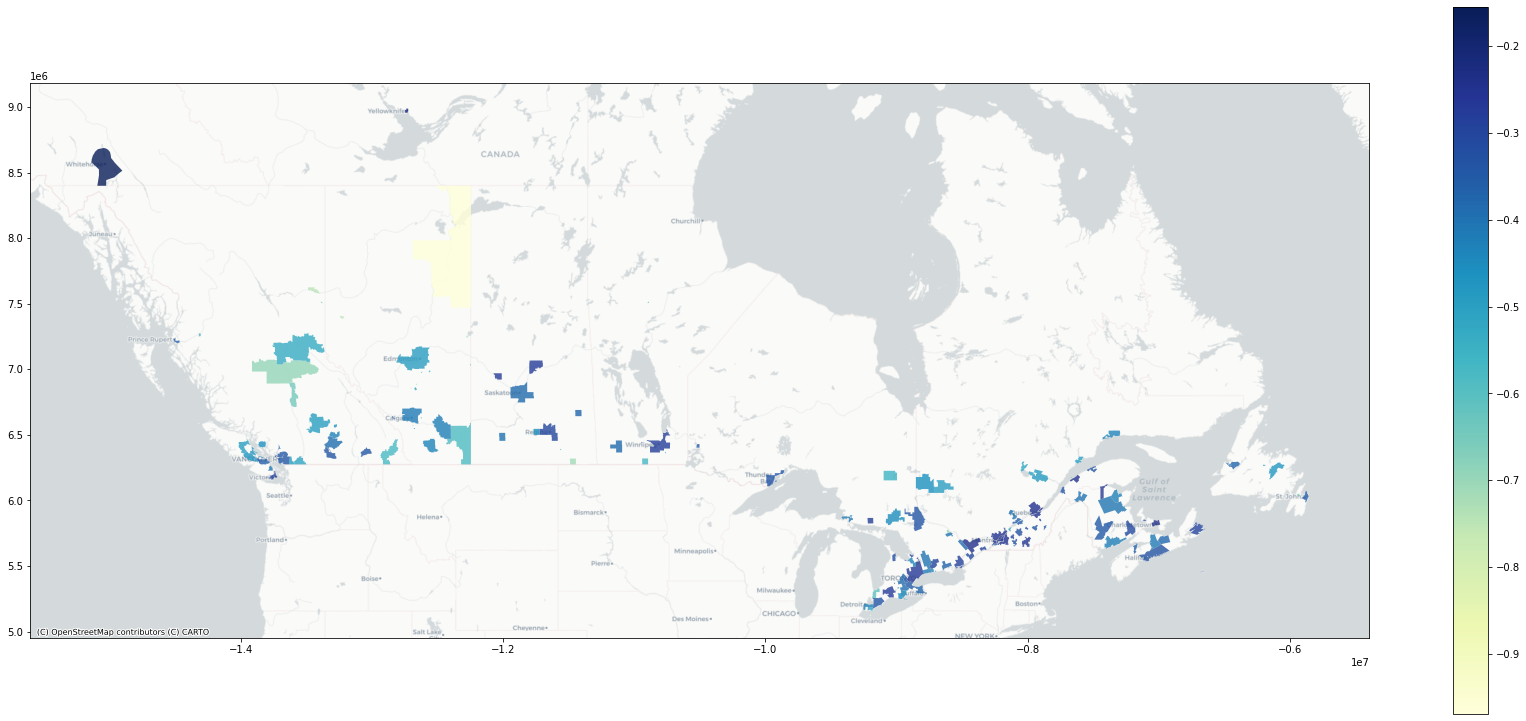

In [ ]:
#plot merged file. use dropna to remove any country with no revenue value
ax = df_forplotting.dropna().plot(column='prct_diff_female2male', cmap =    
                                'YlGnBu', alpha=1.0, figsize=(30,13), k=3, legend =  
                                  True);

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

## Scatter plot


In [ ]:
# List of liveability 

# 15 minute commute



## Air Pollution and Weather Layers

Layer on 


## Setup Comparison Global Cities

In [ ]:
cities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7343 entries, 0 to 7342
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       7343 non-null   object  
 1   worldcity  7343 non-null   float64 
 2   megacity   7343 non-null   int64   
 3   latitude   7343 non-null   float64 
 4   longitude  7343 non-null   float64 
 5   pop_max    7343 non-null   int64   
 6   pop_min    7343 non-null   int64   
 7   pop_other  7343 non-null   int64   
 8   geometry   7343 non-null   geometry
dtypes: float64(3), geometry(1), int64(4), object(1)
memory usage: 516.4+ KB


In [ ]:
# There are 7343 Cities in this dataset
# Let's only look at 'World Cities' (70) and 'Mega Cities' (590) to start...
cities_filtered = cities.query('megacity == 1.0 or worldcity == 1.0')
cities_filtered.info() #now 594 cities :)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 594 entries, 880 to 7342
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       594 non-null    object  
 1   worldcity  594 non-null    float64 
 2   megacity   594 non-null    int64   
 3   latitude   594 non-null    float64 
 4   longitude  594 non-null    float64 
 5   pop_max    594 non-null    int64   
 6   pop_min    594 non-null    int64   
 7   pop_other  594 non-null    int64   
 8   geometry   594 non-null    geometry
dtypes: float64(3), geometry(1), int64(4), object(1)
memory usage: 46.4+ KB


In [ ]:
# Check CRS
cities_filtered.crs #EPSG:4326
countries.crs #EPSG:4326

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

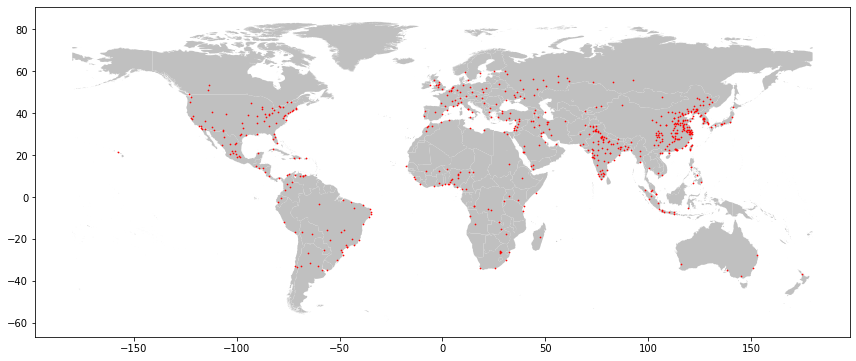

In [ ]:
# Plot maps
fig, ax = plt.subplots(figsize=(12,12))
countries.plot(ax=ax, color='silver')
cities_filtered.plot(markersize=0.5, color='red',ax=ax)
plt.tight_layout()
plt.savefig('overlay_map.png')
plt.show()

## Another layer...


